In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data preparation
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'overcast', 'sunny', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'rain',
                'sunny', 'overcast', 'rain', 'sunny', 'rain', 'overcast', 'sunny', 'rain', 'overcast', 'sunny', 'overcast', 'rain', 'sunny', 'rain'],
    'Temp.': [92.0, 78.0, 75.0, 70.0, 62.0, 68.0, 85.0, 73.0, 65.0, 88.0, 76.0, 63.0, 83.0, 66.0,
              91.0, 77.0, 64.0, 79.0, 61.0, 72.0, 86.0, 67.0, 74.0, 89.0, 75.0, 65.0, 82.0, 63.0],
    'Humid.': [95.0, 65.0, 82.0, 90.0, 75.0, 70.0, 88.0, 78.0, 95.0, 72.0, 80.0, 85.0, 68.0, 92.0,
               93.0, 80.0, 88.0, 70.0, 78.0, 75.0, 85.0, 92.0, 77.0, 68.0, 83.0, 90.0, 65.0, 87.0],
    'Wind': [False, False, False, True, False, False, False, True, False, False, True, True, False, True,
             True, True, False, False, True, False, True, True, False, False, True, False, False, True],
    'Num_Players': [25, 85, 80, 30, 17, 82, 45, 78, 32, 65, 70, 20, 87, 24,
                   28, 68, 35, 75, 25, 72, 55, 32, 70, 80, 65, 24, 85, 25]
}

# Data preprocessing
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)

## Train-Test Split

In [3]:
# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

## Model Training - Decision Trees with Different Depths

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Define constants
RANDOM_STATE = 3 # As regression tree can be sensitive, setting this parameter assures that we always get the same tree
MAX_DEPTH = 5

# Initialize models
trees = {depth: DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_STATE).fit(X_train, y_train) 
         for depth in range(1, MAX_DEPTH + 1)}

## Visualize Decision Trees

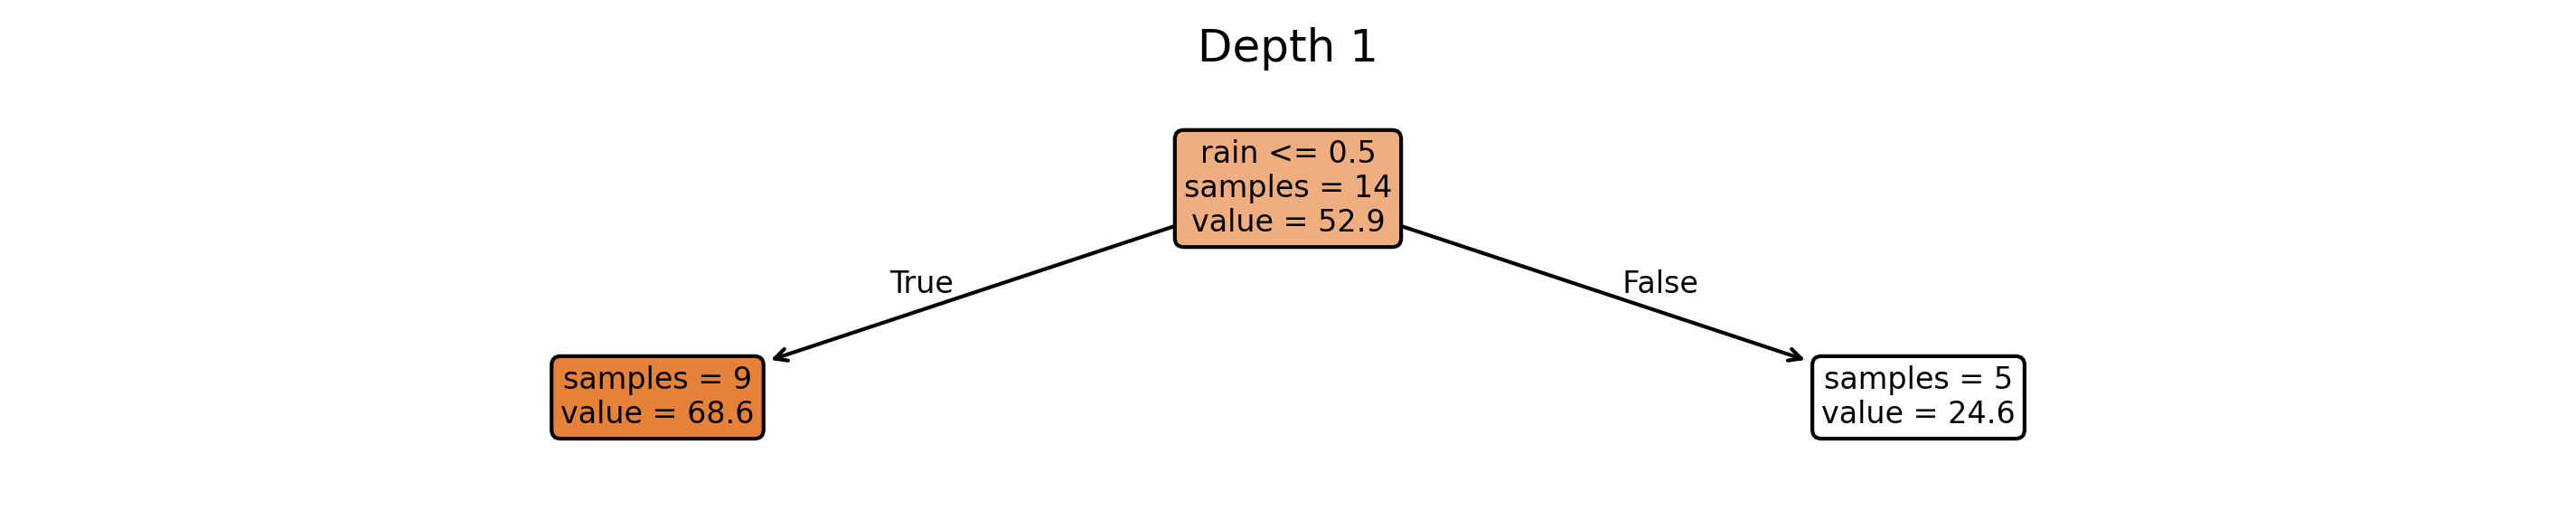

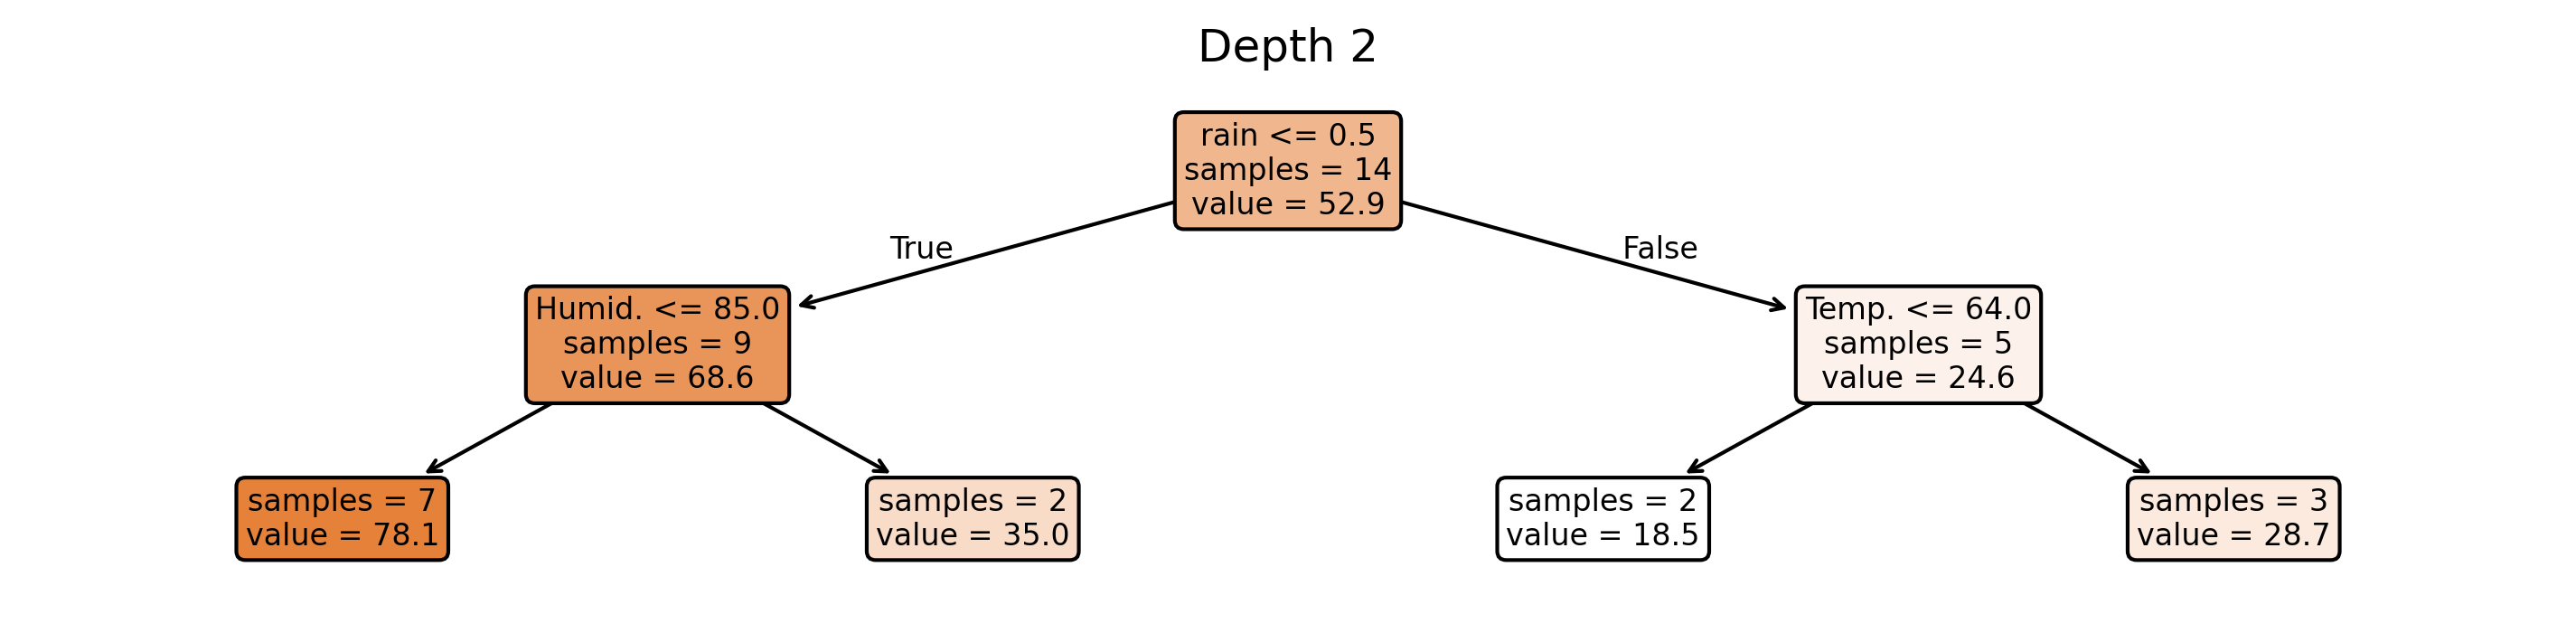

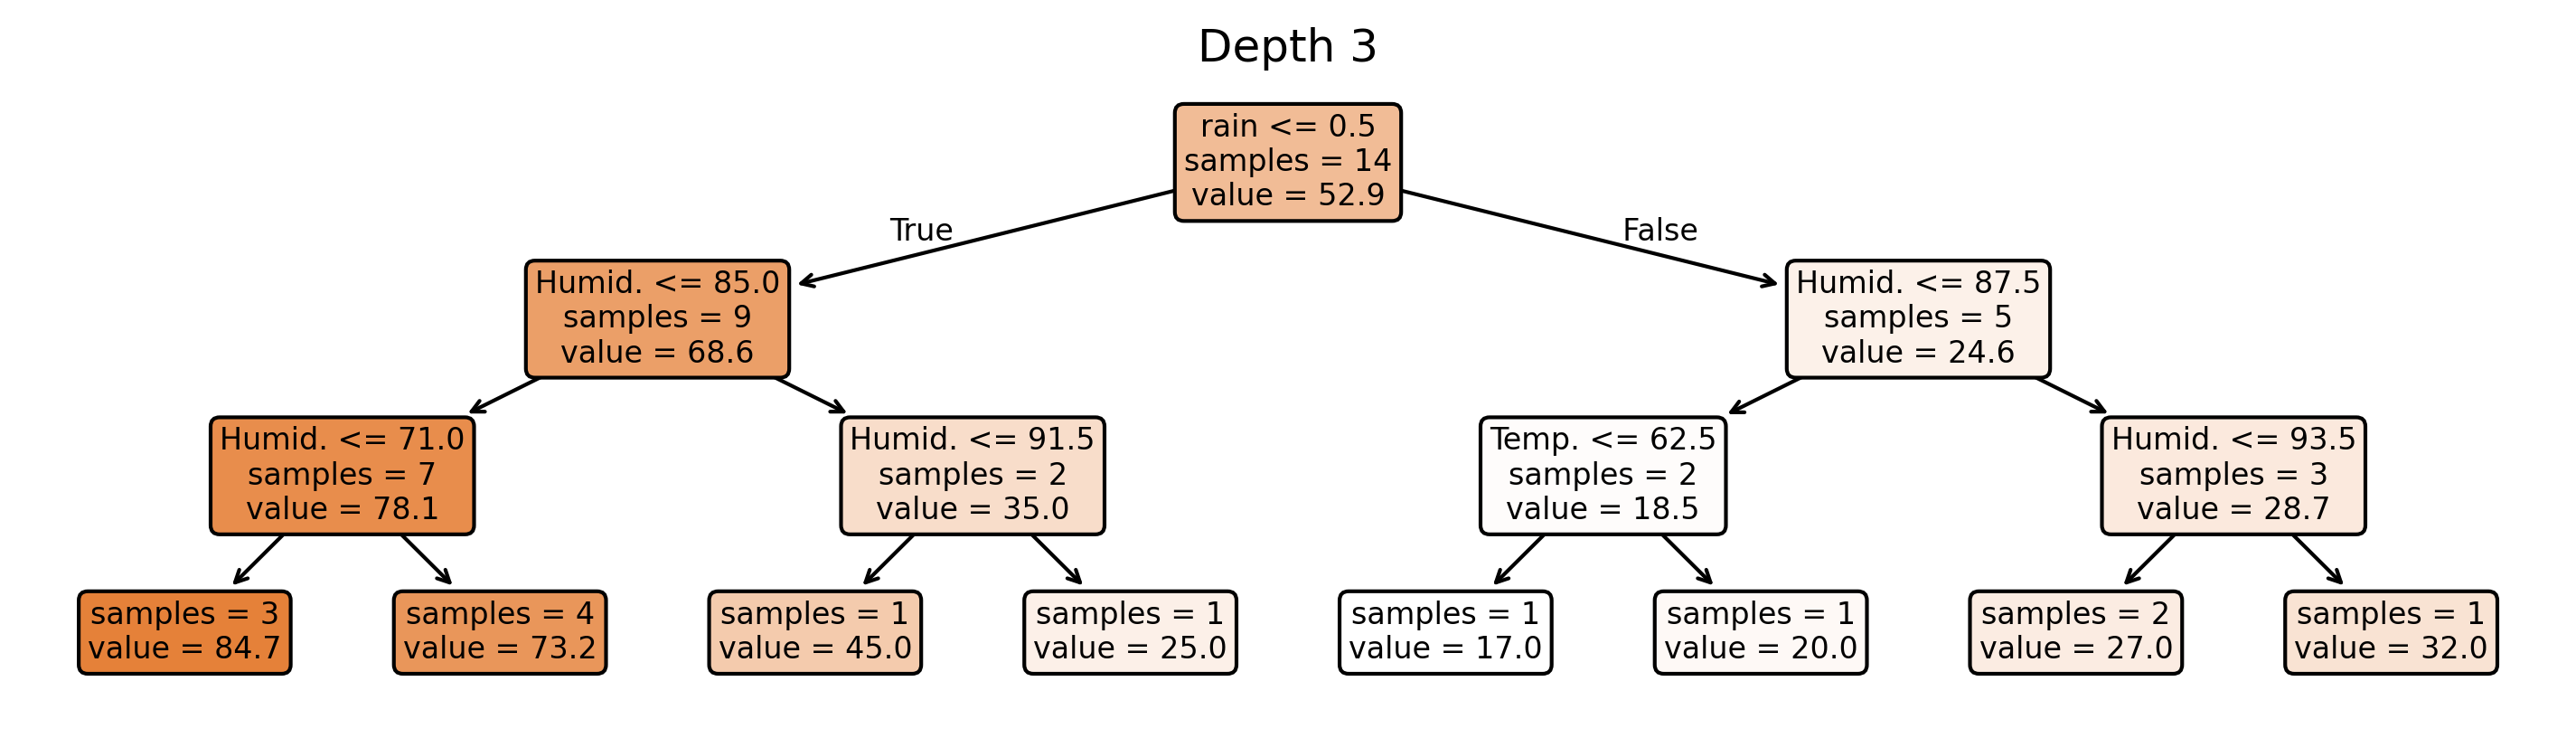

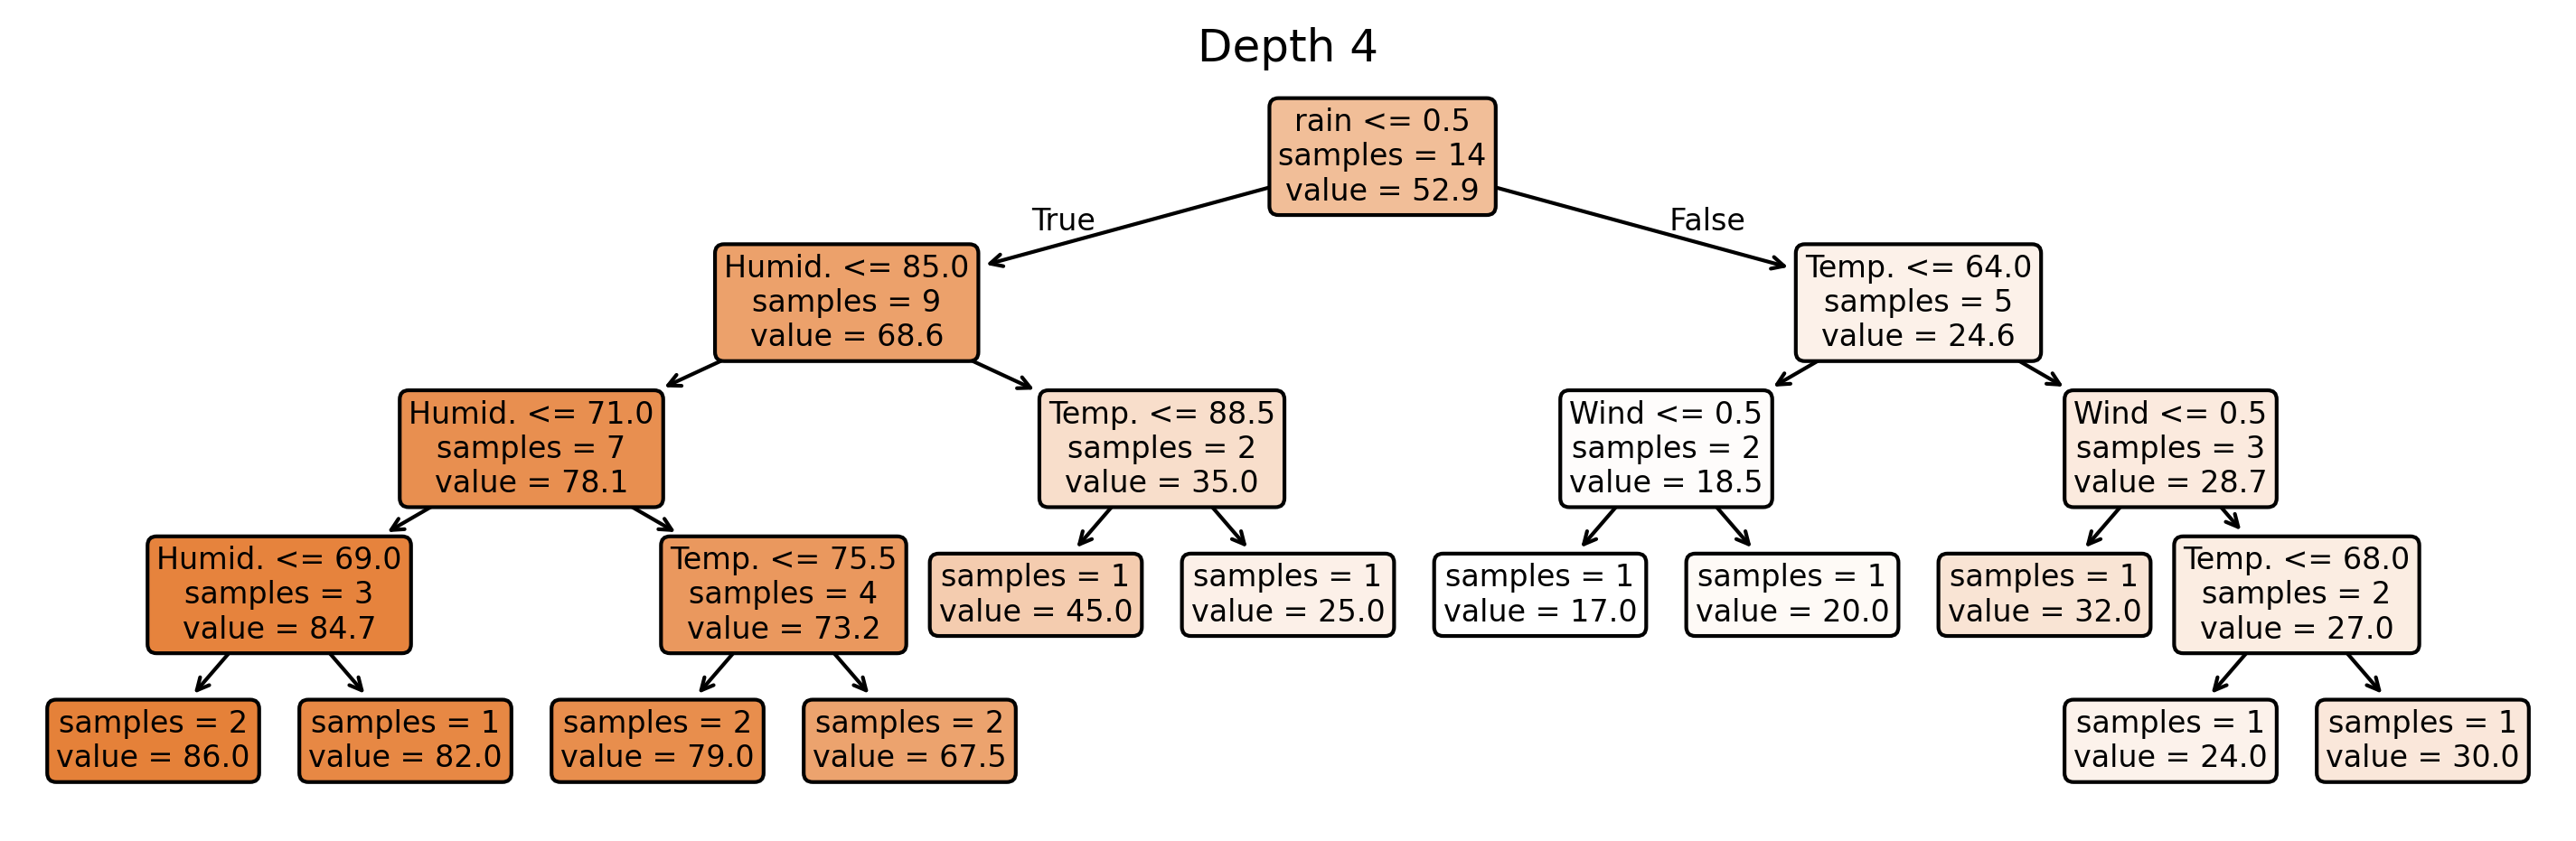

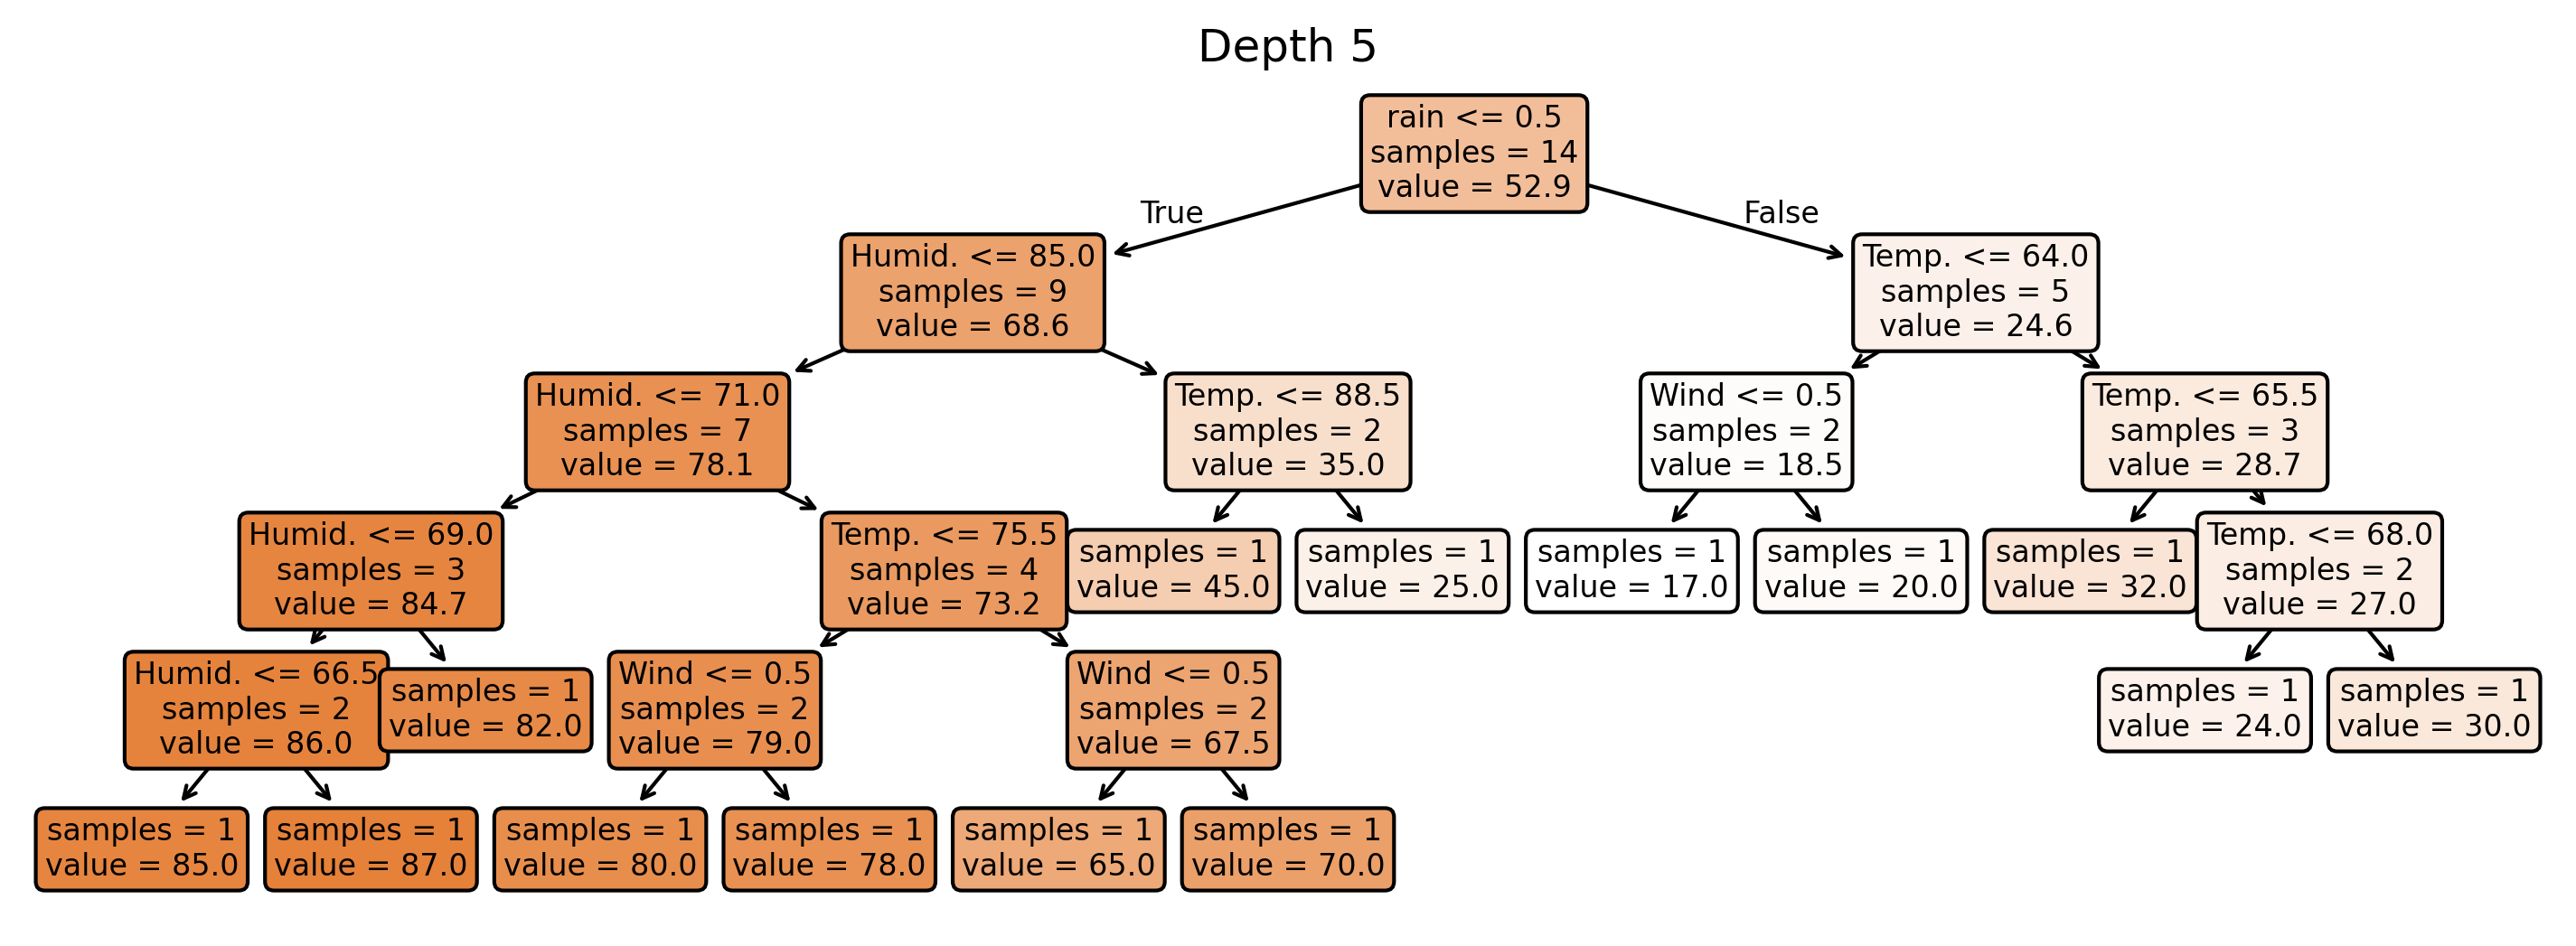

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot trees
for depth in range(1, MAX_DEPTH + 1):
    plt.figure(figsize=(12, 0.5*depth+1.5), dpi=300)
    plot_tree(trees[depth], feature_names=X_train.columns.tolist(), 
              filled=True, rounded=True, impurity=False, precision=1, fontsize=8)
    plt.title(f'Depth {depth}')
    plt.show()

## Generate Predictions

In [6]:
# Create training predictions DataFrame
train_predictions = pd.DataFrame({
    f'Depth_{i}': trees[i].predict(X_train) for i in range(1, MAX_DEPTH + 1)
})
#train_predictions['Actual'] = y_train.values
train_predictions.index = X_train.index

# Create test predictions DataFrame
test_predictions = pd.DataFrame({
    f'Depth_{i}': trees[i].predict(X_test) for i in range(1, MAX_DEPTH + 1)
})
#test_predictions['Actual'] = y_test.values
test_predictions.index = X_test.index

print("\nTraining Predictions:")
print(train_predictions.round(1))
print("\nTest Predictions:")
print(test_predictions.round(1))


Training Predictions:
    Depth_1  Depth_2  Depth_3  Depth_4  Depth_5
0      68.6     35.0     25.0     25.0     25.0
1      68.6     78.1     84.7     86.0     85.0
2      68.6     78.1     73.2     79.0     80.0
3      24.6     28.7     27.0     30.0     30.0
4      24.6     18.5     17.0     17.0     17.0
5      68.6     78.1     84.7     82.0     82.0
6      68.6     35.0     45.0     45.0     45.0
7      68.6     78.1     73.2     79.0     78.0
8      24.6     28.7     32.0     32.0     32.0
9      68.6     78.1     73.2     67.5     65.0
10     68.6     78.1     73.2     67.5     70.0
11     24.6     18.5     20.0     20.0     20.0
12     68.6     78.1     84.7     86.0     87.0
13     24.6     28.7     27.0     24.0     24.0

Test Predictions:
    Depth_1  Depth_2  Depth_3  Depth_4  Depth_5
14     68.6     35.0     25.0     25.0     25.0
15     68.6     78.1     73.2     67.5     70.0
16     24.6     18.5     27.0     17.0     17.0
17     68.6     78.1     84.7     82.0     82.

## Calculate RMSE (Root Mean Square Error)

In [7]:
from sklearn.metrics import root_mean_squared_error

# Calculate RMSE values
train_rmse = {depth: root_mean_squared_error(y_train, tree.predict(X_train))
              for depth, tree in trees.items()}
test_rmse = {depth: root_mean_squared_error(y_test, tree.predict(X_test))
             for depth, tree in trees.items()}

# Print RMSE summary as DataFrame
summary_df = pd.DataFrame({
    'Train RMSE': train_rmse.values(),
    'Test RMSE': test_rmse.values()
}, index=range(1, MAX_DEPTH + 1))
summary_df.index.name = 'max_depth'

print("\nSummary of RMSE values:")
print(summary_df.round(2))


Summary of RMSE values:
           Train RMSE  Test RMSE
max_depth                       
1               16.13      13.26
2                6.67      10.05
3                3.56       7.33
4                1.09       8.78
5                0.00       9.15


## Plot Train vs Test RMSE

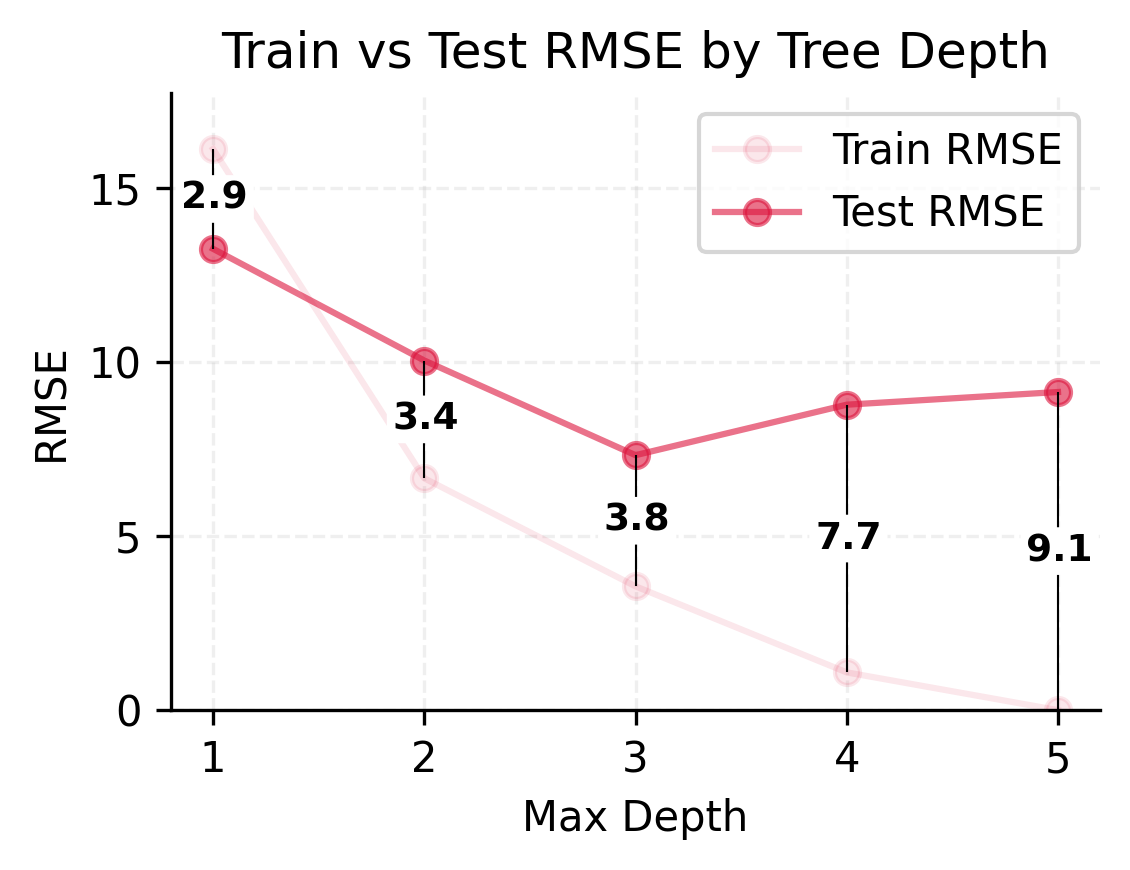

In [8]:
# Create figure
plt.figure(figsize=(4, 3), dpi=300)
ax = plt.gca()

# Plot main lines
plt.plot(summary_df.index, summary_df['Train RMSE'], marker='o', label='Train RMSE', 
         linestyle='-', color='crimson', alpha=0.1)
plt.plot(summary_df.index, summary_df['Test RMSE'], marker='o', label='Test RMSE', 
         linestyle='-', color='crimson', alpha=0.6)

# Add vertical lines and difference labels
for depth in summary_df.index:
    train_val = summary_df.loc[depth, 'Train RMSE']
    test_val = summary_df.loc[depth, 'Test RMSE']
    diff = abs(test_val - train_val)

    # Draw vertical line
    plt.vlines(x=depth, ymin=min(train_val, test_val), ymax=max(train_val, test_val), 
               colors='black', linestyles='-', lw=0.5)

    # Add white box behind text
    bbox_props = dict(boxstyle="round,pad=0.1", fc="white", ec="white")
    plt.text(depth - 0.15, (train_val + test_val) / 2, f'{diff:.1f}', 
             verticalalignment='center', fontsize=9, fontweight='bold',
             bbox=bbox_props)

# Customize plot
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Train vs Test RMSE by Tree Depth')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set limits
plt.xlim(0.8, 5.2)
plt.ylim(0, summary_df['Train RMSE'].max() * 1.1)

plt.tight_layout()
plt.show()

## Cross-Validation to Find the Best Balance

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evaluate_model(X_train, y_train, X_test, y_test, n_splits=7, random_state=42):
   kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
   depths = range(1, 6)
   results = []

   for depth in depths:
       # Cross-validation scores
       cv_scores = []
       for train_idx, val_idx in kf.split(X_train):
           # Split data
           X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
           y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

           # Train and evaluate
           model = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_STATE)
           model.fit(X_tr, y_tr)
           val_pred = model.predict(X_val)
           cv_scores.append(np.sqrt(mean_squared_error(y_val, val_pred)))

       # Test set performance
       model = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_STATE)
       model.fit(X_train, y_train)
       test_pred = model.predict(X_test)
       test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

       # Store results
       results.append({
           'CV Mean RMSE': np.mean(cv_scores),
           'CV Std': np.std(cv_scores),
           'Test RMSE': test_rmse
       })

   return pd.DataFrame(results, index=pd.Index(depths, name='Depth')).round(2)

# Usage:
cv_df = evaluate_model(X_train, y_train, X_test, y_test)
print(cv_df)

       CV Mean RMSE  CV Std  Test RMSE
Depth                                 
1             24.78   13.65      13.26
2             17.21   11.77      10.05
3             16.58   12.33       7.33
4             16.13   12.25       8.78
5             16.18   12.10       9.15
